<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [12]:
import pandas as pd
import sys
import matplotlib.pyplot as plt
%pip install seaborn
import seaborn as sns
import numpy as np

Load the dataset into a dataframe.


<h2>Read Data</h2>
<p>
We utilize the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.
</p>


The functions below will download the dataset into your browser:


In [13]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

In [14]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv"

To obtain the dataset, utilize the download() function as defined above:  


In [15]:
await download(file_path, "m2_survey_data.csv")
file_name="m2_survey_data.csv"

Utilize the Pandas method read_csv() to load the data into a dataframe.


In [16]:
df = pd.read_csv(file_name)

> Note: This version of the lab is working on JupyterLite, which requires the dataset to be downloaded to the interface.While working on the downloaded version of this notebook on their local machines(Jupyter Anaconda), the learners can simply **skip the steps above,** and simply use the URL directly in the `pandas.read_csv()` function. You can uncomment and run the statements in the cell below.


In [ ]:
#df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


<ipython-input-26-d1456822dd4c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.ConvertedComp)#It is important to note thatseaborn will be removing sns.distplot in seaborn v0.14.0


<AxesSubplot:xlabel='ConvertedComp', ylabel='Density'>

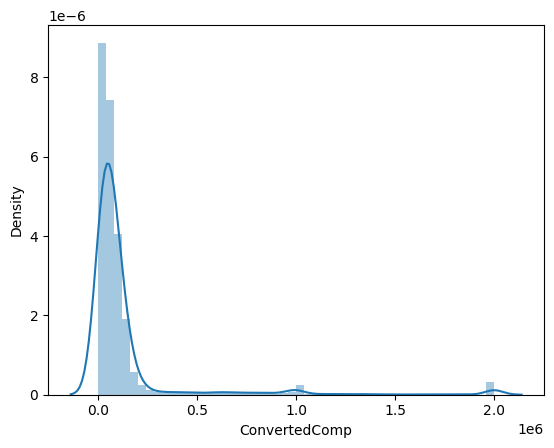

In [26]:
# your code goes here
sns.distplot(df.ConvertedComp)#It is important to note thatseaborn will be removing sns.distplot in seaborn v0.14.0 

<AxesSubplot:xlabel='ConvertedComp', ylabel='Density'>

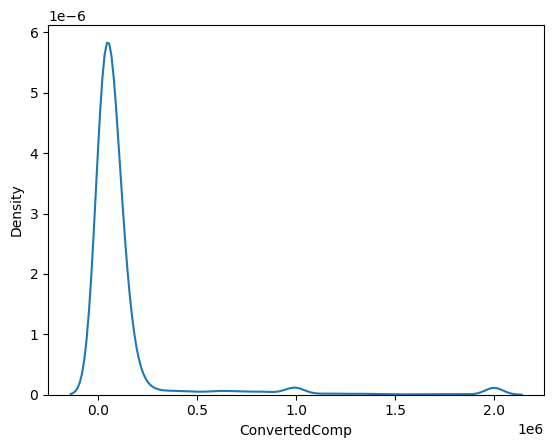

In [28]:
#one option for seaborn v0.14.0 would be to create a kdeplot which is used to plot univariate or bivariate distributions
sns.kdeplot(df.ConvertedComp)

<AxesSubplot:xlabel='ConvertedComp', ylabel='Count'>

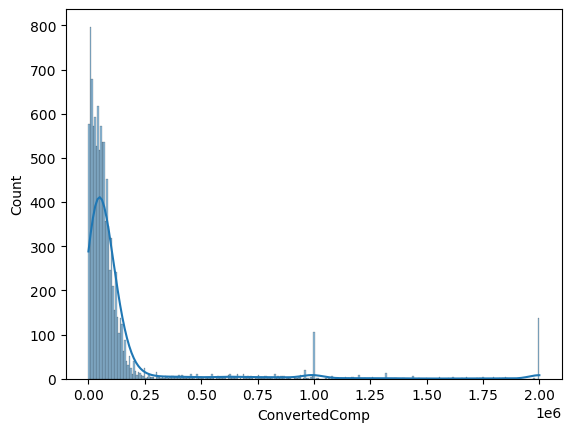

In [29]:
# you can also diplay the distribution line on a histogram  by setting kde=true
sns.histplot(df.ConvertedComp, kde=True)

Plot the histogram for the column `ConvertedComp`.


<AxesSubplot:xlabel='ConvertedComp', ylabel='Count'>

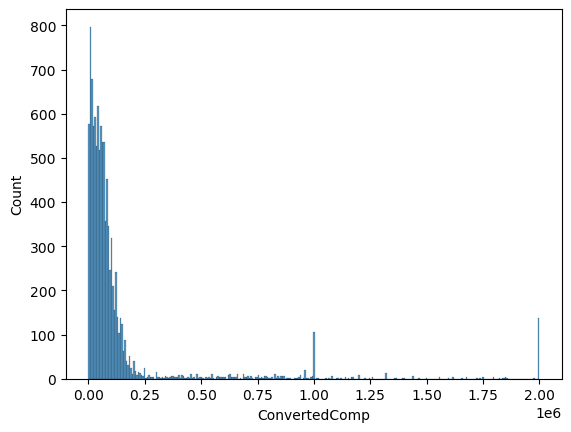

In [23]:
# your code goes here
sns.histplot(df.ConvertedComp)

What is the median of the column `ConvertedComp`?


In [27]:
# your code goes here
df.ConvertedComp.median()

57745.0

How many responders identified themselves only as a **Man**?


In [36]:
# your code goes here
num_man_respondents = df['Gender'].value_counts()['Man']
print(f"Number of responders who identify as a man: {num_man_respondents}")

Number of responders who identify as a man: 10480


Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [37]:
# your code goes here
woman_respondents = df[df['Gender'] == 'Woman']

# Get the count of respondents who identify as a man
num_woman_respondents = len(woman_respondents)

print(f"Number of responders who identify as a woman: {num_woman_respondents}")


Number of responders who identify as a woman: 731


In [38]:
df.Gender.value_counts()

Man                                                            10480
Woman                                                            731
Non-binary, genderqueer, or gender non-conforming                 63
Man;Non-binary, genderqueer, or gender non-conforming             26
Woman;Non-binary, genderqueer, or gender non-conforming           14
Woman;Man                                                          9
Woman;Man;Non-binary, genderqueer, or gender non-conforming        2
Name: Gender, dtype: int64

Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [41]:
# your code goes here
age_summary = df['Age'].quantile([0, 0.25, 0.5, 0.75, 1])
print("Five-number summary for Age:")
print(f"Min: {age_summary[0.0]}")
print(f"25%: {age_summary[0.25]}")
print(f"50%: {age_summary[0.5]}")
print(f"75%: {age_summary[0.75]}")
print(f"Max: {age_summary[1.0]}")

Five-number summary for Age:
Min: 16.0
25%: 25.0
50%: 29.0
75%: 35.0
Max: 99.0


Plot a histogram of the column `Age`.


<AxesSubplot:xlabel='Age', ylabel='Count'>

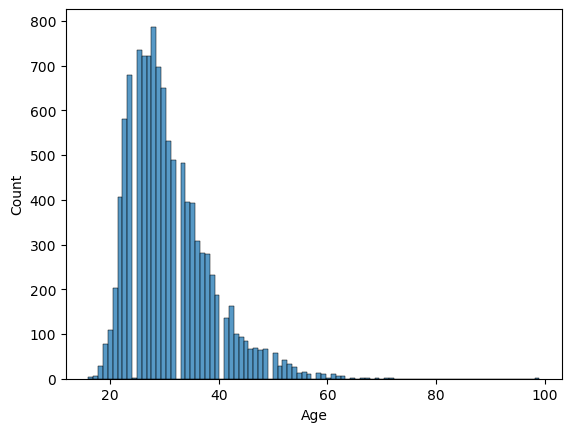

In [43]:
# your code goes here
sns.histplot(df.Age)

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


<AxesSubplot:xlabel='ConvertedComp'>

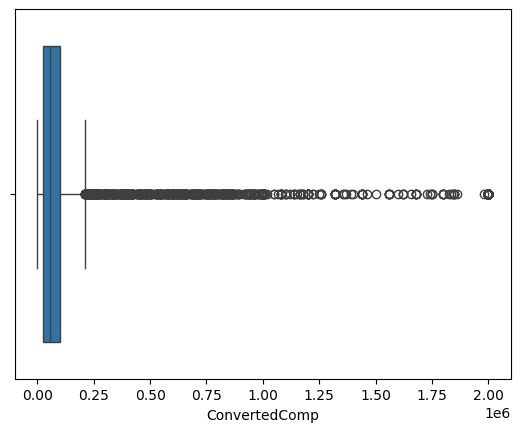

In [49]:
# your code goes here
sns.boxplot(x=df.ConvertedComp)

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [55]:
# your code goes here
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)
IQR = Q3 - Q1
print(f"Inter Quartile Range (IQR) for ConvertedComp: {IQR}")

Inter Quartile Range (IQR) for ConvertedComp: 73132.0


Find out the upper and lower bounds.


In [53]:
# your code goes here
whiskers = 1.5*IQR

Lower = df.ConvertedComp.describe()[4] - whiskers
Upper = df.ConvertedComp.describe()[6] + whiskers

print("Upper bound: {},  Lower bound: {}".format(Upper, Lower))

Upper bound: 209698.0,  Lower bound: -82830.0


Identify how many outliers are there in the `ConvertedComp` column.


In [85]:
# your code goes here
LB = Q1 - 1.5 * IQR
UB = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['ConvertedComp'] < LB) | (df['ConvertedComp'] > UB)]

# Count the number of outliers
num_outliers = len(outliers)

print(f"Number of outliers in ConvertedComp: {num_outliers}")

Number of outliers in ConvertedComp: 879


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [86]:
# your code goes here
df = df[(df['ConvertedComp'] >= LB) & (df['ConvertedComp'] <= UB)]

print("New DataFrame:", df.shape)
df.describe()

New DataFrame Shape: (9703, 85)


,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
count,9703.000000,9.703000e+03,9703.000000,9664.000000,7612.000000,9493.000000
mean,12501.007317,7.241139e+05,59883.208389,41.864782,4.737455,30.695860
std,7235.627217,7.186806e+06,43394.336755,24.613489,4.420472,7.346625
min,4.000000,0.000000e+00,0.000000,3.000000,0.000000,16.000000
25%,6237.000000,2.000000e+04,24060.000000,40.000000,2.000000,25.000000
50%,12571.000000,6.300000e+04,52704.000000,40.000000,4.000000,29.000000
75%,18787.500000,1.150000e+05,85574.500000,42.000000,5.000000,34.000000
max,25141.000000,3.900000e+08,209356.000000,1012.000000,99.000000,99.000000


In [87]:
df.ConvertedComp.median()

52704.0

Find the correlation between `Age` and all other numerical columns.


In [94]:
# your code goes here
numerical_cols = df.select_dtypes(include=[int, float]).columns
correlations = df[['Age'] + list(numerical_cols)].corr()['Age']
print(correlations)

                    Age       Age
Age            1.000000  1.000000
Respondent     0.002180  0.002180
CompTotal      0.006337  0.006337
ConvertedComp  0.401821  0.401821
WorkWeekHrs    0.032032  0.032032
CodeRevHrs    -0.012878 -0.012878
Age            1.000000  1.000000


In [67]:
df.corr(numeric_only=True)

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
Respondent,1.000000,-0.019354,0.010878,-0.016221,0.005293,0.002180
CompTotal,-0.019354,1.000000,-0.063561,0.004910,0.017007,0.006337
ConvertedComp,0.010878,-0.063561,1.000000,0.034351,-0.088934,0.401821
WorkWeekHrs,-0.016221,0.004910,0.034351,1.000000,0.038935,0.032032
CodeRevHrs,0.005293,0.017007,-0.088934,0.038935,1.000000,-0.012878
Age,0.002180,0.006337,0.401821,0.032032,-0.012878,1.000000


In [80]:
df = pd.read_csv(file_name)

In [81]:
if isinstance(df, pd.DataFrame):
    print(df.Age.median())
else:
    print("df is not a DataFrame")

29.0


In [82]:
woman_median_comp = df[df['Gender'] == 'Woman']['ConvertedComp'].median()
print(woman_median_comp)

57708.0


<AxesSubplot:ylabel='Age'>

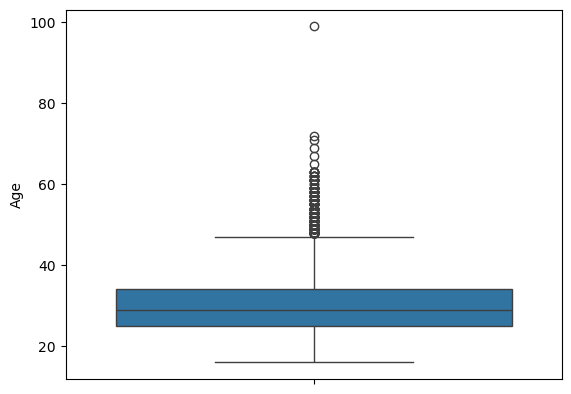

In [89]:
sns.boxplot(df.Age)

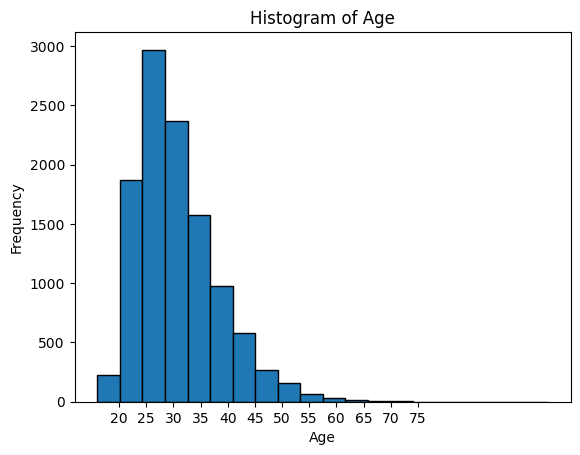

In [83]:
plt.hist(df['Age'], bins=20, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age')
plt.xticks(range(20, 80, 5))  # specify the x-axis tickers
plt.show()

In [91]:
mean_value = df['ConvertedComp'].mean()
print(f"ConvertedComp mean: {mean_value}")


ConvertedComp mean: 59883.20838915799


In [92]:
max_corr = corr_matrix['Age'].abs().max()
highly_correlated_column = corr_matrix['Age'].abs().argmax()

print(f"highest correlation with Age {highly_correlated_column} with a correlation value of {max_corr:.2f}.")

highest correlation with Age 5 with a correlation value of 1.00.


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
